# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression


# Load data

In [3]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

print('X_train size = ', X_train.shape)
print('X_test size = ', X_test.shape)

categories = [str(x) for x in set(np.unique(y_train))]

X_train size =  (106, 13)
X_test size =  (72, 13)


Lets take a quick look at the data:

You can see details and metadata here, including the meaning of features:
https://scikit-learn.org/stable/datasets/index.html#wine-dataset

In [4]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


__Statement: if you perform PCA and maintain all of the principal components, no data is discarded and you did not perform dimensionality reduction.__

__Q1: Do you agree? Explain your answer__

***

Answer: 
I agree with this statement
-  In PCA we create a principal component for each dimension. If we maintain all principal components, then the data remains in the same dimension (no dimensionality reduction), and is only tranformed into a new basis (no data is discarded). Data will be discarded only if we remove principal components.
- However, we do lose the interpability of the model, as the principal components are linear combinations of the origianl variables so we have the same number of features/dimensions but we don't have a clear understanding of what each variable stands for.


We can see below that with all the components we can explain all the variance as before (explained variance ratio=1). Also if we perform the inverse transform we get back exactly the same data as before (the mean difference between corresponding data points is negligible - see below)
***

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(X)
X_s = scaler.transform(X)
 
pca = PCA()
X_p= pca.fit_transform(X_s)
X_inv=pca.inverse_transform(X_p)
print(f"Explained variance ratio after transformation: {np.sum(pca.explained_variance_ratio_):.3f}")
print(f"Mean difference between corresponding points - original and reconstructed Data: {np.mean(np.sum(X_s-X_inv,axis=1)):.3f}")

 

Explained variance ratio after transformation: 1.000
Mean difference between corresponding points - original and reconstructed Data: 0.000


### helper functions for next questions

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

RAND = 2

def create_run_evaluate(scale = None, pca = None, classifier = None, output = True):
    '''create a pipeline from the passed params, fit it and evaluate on test set'''
    
    pipeline = make_pipeline(scale, pca, classifier)
    pipeline.fit(X_train, y_train)
    
    return pipeline, evaluate_model(pipeline, output);

def evaluate_model(classifier, output = True):
    '''calculate accuracy of classifier based on test set'''
    
    y_test_pred = classifier.predict(X_test)
    y_train_pred = classifier.predict(X_train)
    
    train_acc_score = accuracy_score(y_train, y_train_pred)
    test_acc_score = accuracy_score(y_test, y_test_pred)
    
    
    if output:
        print(f'Model accuracy (Train) {train_acc_score:.3f}')        
        print(f'Model accuracy (Test) {test_acc_score:.3f}')

    return round(test_acc_score,5)


def display_features_distribution(X):
    '''display the distribution of all features in the dataset'''

    fig = plt.figure(figsize=(15, 15));

    for feat in range(X_train.shape[1]):
        fig.add_subplot(3, 5, feat+1)
        plt.title(f'feature {feat}')
        plt.hist(X[:, feat])
        
#display_features_distribution(X_train)
#display_features_distribution(X_test)

In [7]:
# imports for following sections

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# PCA + Random forest

Task 1: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [8]:

create_run_evaluate(scale = StandardScaler(), classifier = RandomForestClassifier(random_state=RAND));


Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


***

Random Forest Model accuracy on the test set is `0.986`

***

Task 2: Now do the same, but use PCA.

You are asked to use the **maximal number** of componenets for PCA.
Print the accuracy of Random forest + PCA.

Remeber, you should center and scale your data before you apply PCA.

In [9]:

create_run_evaluate(StandardScaler(), PCA(), RandomForestClassifier(random_state=RAND));


Model accuracy (Train) 1.000
Model accuracy (Test) 0.944


***

Random Forest Model + PCA (all components) accuracy on the test set is `0.944`

***

__Q2: By applying PCA, did random forest's results improved\stayed the same\got worse?__

***

__Answer:__ The Random Forest's results became worse. From `0.986` without PCA to `0.944` with PCA

***

# PCA + logistic regression

Task 3: repeat task 1 with logistic regression.


In [10]:

create_run_evaluate(scale = StandardScaler(), classifier = LogisticRegression(random_state=RAND));


Model accuracy (Train) 1.000
Model accuracy (Test) 0.986



Task 4: repeast task 2 with logistic regression.

In [11]:

create_run_evaluate(StandardScaler(), PCA(), LogisticRegression(random_state=RAND)) ;


Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


__*Q3*: By applying PCA, Did linear regression results improved\stayed the same\got worse?__

***

__Answer__: The results stayed the same.

***

__Q4: Explain the differences between answers to Q2 and Q3.__

***

__Answer:__

The results got worse for the Random Forest and stayed the same for Logistic Regression.

For linear regression classifier - it forms linear boundaries - a line or a plane seperator, hence the rotation of the axes will just imply rotation of that plane\line and the transformation doesn't impair it. Applying PCA doesn't change the results, as the new input variables created by PCA is just a linear transformation of the original inputs, so the predictions should stay the same.

Random Forest, on the other hand, doesn't use a transformation matrix for prediction, but is based on multiple descision trees. Desicion tree's splits are orthogonal, which makes them more sensitive to variations in the training data: Decision trees make rectilinear seperation, so a good score means that rectilinear boundaries are efficient in seperating the data. Applying PCA transforms the coordinates system so may turn these rectilinear boundaries into diagonal ones and thus impact the performance

***

__Finding the optimal number of compoenets:__

You team decided that you must compress the data and PCA was selected. However, you are not sure how many principals components to have. Implemented the following techniques (should work without human intervention):

1. Keeping at least 50% of the variance with minimum number of components
2. Keeping above average components only
3. The number of componets which maximize the accuracy of Linear regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing



In [28]:
pipeline, _ = create_run_evaluate(StandardScaler(), 
                                         PCA(), 
                                         LogisticRegression(random_state=RAND), output = False)

explained_variance_ratio_vec = pipeline.named_steps['pca'].explained_variance_ratio_


In [47]:
num_of_pc_rev = range(X_train.shape[1], 1, -1)
var_threshold = 0.5

var_ratio_mean = explained_variance_ratio_vec.mean()

In [48]:
# 1. Keeping at least 50% of the variance with minimum number of components

def get_pca_for_variance():
    
    res, = np.where(np.cumsum(explained_variance_ratio_vec) >= var_threshold)
    pc = res[0] + 1
    variance = np.sum(explained_variance_ratio_vec[:pc])
    print(f'Min PCA components that retain over 50% variance = {pc} (variance retained = {variance:.3f})')

get_pca_for_variance()

Min PCA components that retain over 50% variance = 2 (variance retained = 0.575)


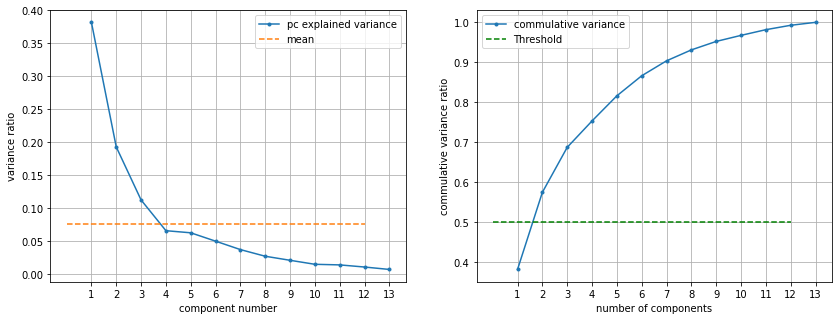

In [49]:
# plot the variance by number of compoenents

fig = plt.figure(figsize=(14, 5));
x_values = np.arange(1, X_train.shape[1]+1, step=1)


fig.add_subplot(1, 2, 1)
plt.plot(x_values, explained_variance_ratio_vec, marker = '.', label = 'pc explained variance')
plt.xlabel('component number')
plt.ylabel('variance ratio')
plt.plot([0,12], [var_ratio_mean, var_ratio_mean], "--", label = 'mean')
plt.legend()
plt.xticks(x_values)
plt.grid()


fig.add_subplot(1, 2, 2)
plt.plot(x_values, cumsum_var, marker = '.', label = 'commulative variance')
plt.xlabel('number of components')
plt.ylabel('commulative variance ratio')
plt.plot([0,12], [var_threshold, var_threshold], "g--", label = 'Threshold')
plt.legend()
plt.xticks(x_values)
plt.grid()

plt.show()

In [52]:
# Keeping above var ratio average components only

num_of_pc = range(X_train.shape[1])

def get_pca_above_average_var_ratio():

    res, = np.where(explained_variance_ratio_vec > var_ratio_mean)
    print(f'number of PCA components that have above average var ratio = {res[-1] + 1}')

get_pca_above_average_var_ratio()

number of PCA components that have above average var ratio = 3


PCA components that maximize the accuracy = 7 (accuracy = 0.986)


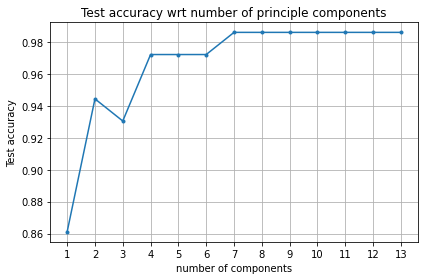

In [53]:
# 2. The number of componets which maximize the accuracy of Linear regression on the test set. 
# Components which improve the accuracy by less than 0.001 are not considered as contributing

def get_pca_best_accuracy():

    accuracy_threshold = 0.001
    num_of_pc = range(1, X_train.shape[1]+1)
    selected_pca = None
    best_accuracy = 0
    accuracy_vec = []

    for num in num_of_pc:

        _, accuracy = create_run_evaluate(StandardScaler(), PCA(n_components=num), 
                                         LogisticRegression(random_state=RAND), output = False)

        accuracy_vec.append(accuracy)
        if accuracy - accuracy_threshold > best_accuracy:
            selected_pca = num
            best_accuracy = accuracy

    print(f'PCA components that maximize the accuracy = {selected_pca} (accuracy = {best_accuracy:.3f})')
    
    return accuracy_vec

accuracy_vec = get_pca_best_accuracy()

# plot accuracy 

plt.plot(x_values, accuracy_vec, marker = '.')
plt.xlabel('number of components')
plt.ylabel('Test accuracy')
plt.grid()
plt.title('Test accuracy wrt number of principle components')
plt.xticks(x_values)
plt.tight_layout()

In [54]:
### Let's run all three methods:

get_pca_for_variance()
get_pca_above_average_var_ratio()
get_pca_best_accuracy();

Min PCA components that retain over 50% variance = 2 (variance retained = 0.575)
number of PCA components that have above average var ratio = 3
PCA components that maximize the accuracy = 7 (accuracy = 0.986)


# Eigenfaces

The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. Wikipedia: https://en.wikipedia.org/wiki/Eigenface

The following code illustrates what each eigenface stands for. Follow the code and the comments:

Total dataset size:
n_samples: 1288
n_features: 1850
Extracting the top 150 eigenfaces from 1288 faces


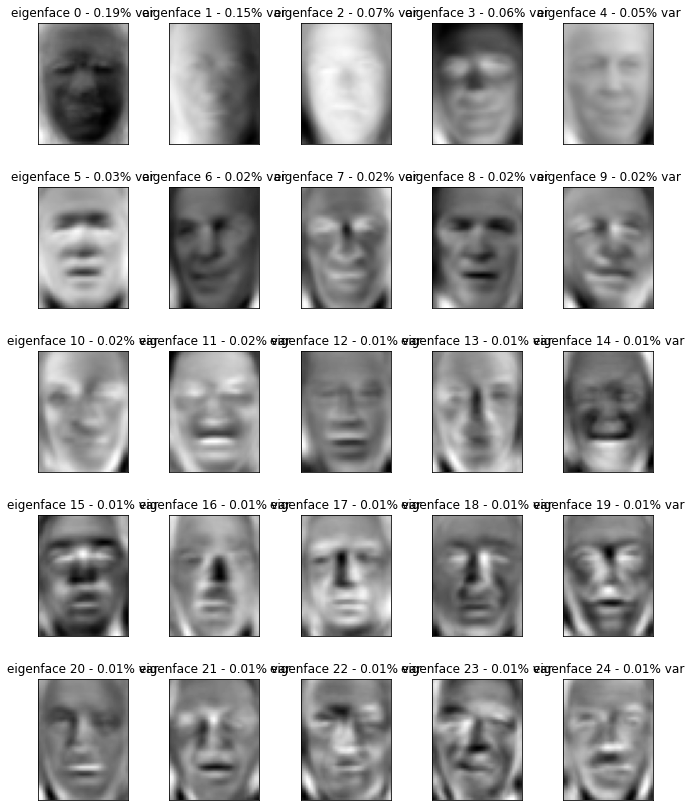

In [19]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)



# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

# Helper function
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#############################################################################
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface {} - {:3.2f}% var".format(i, pca.explained_variance_ratio_[i]) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)

Task 5: Plot the reconstruction of an image with different number of principal components used (1 to 30 components). However, for effiency, you are not allowed to refit the PCA object.

The resulting plot will allow us to understand the contribution of each principal component.
Check the result for different images

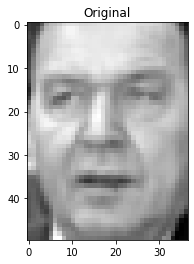

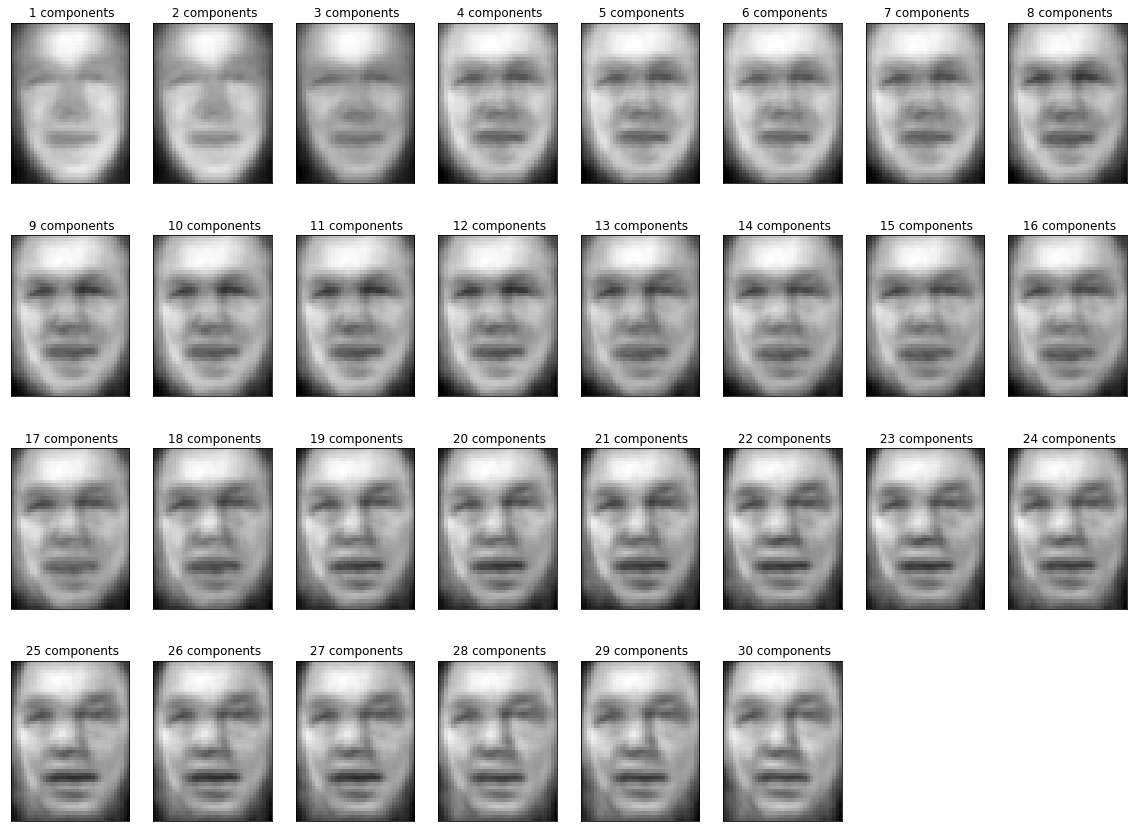

In [58]:
# For a specific image, see how adding PCs affect the reconstruction
pic = X[300] # choose any arbitrary image
numPCs = 30

# plot original image
plt.figure(figsize=(4,4))
plt.imshow(pic.reshape(h, w),cmap=plt.cm.gray)
plt.title('Original')

fig = plt.figure(figsize=(20,15))

for i in range(1, numPCs+1):
    
    ### Take the first i principal components 
    first_i_pcs = pca.components_[:i,:]

    ### Reduce the dimensionality of the image
    pic_transformed = np.dot(pic, first_i_pcs.T)

    ### Reconstruct the image to the original dimension
    approx = np.dot(pic_transformed, first_i_pcs) + pca.mean_
    
    ### Plot the image
    fig.add_subplot(4, 8, i, xticks=[], yticks=[])
    plt.imshow(approx.reshape(h, w),cmap=plt.cm.gray)
    plt.title(f' {i} components', fontsize = 12);


plt.show()